In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, bias=True):
        self.lr = learning_rate
        self.epochs = epochs
        self.bias = bias
        self.w = None

    def predict(self, X):
        if X.shape[1] != self.w.shape[0]:
            X = np.c_[np.ones(X.shape[0]), X]
        return X @ self.w

    def loss_function(self, y_true, y_pred):
        n = y_true.shape[0]
        return (1.0 / n) * (((y_true - y_pred) ** 2).sum())

    def gradient(self, X, y):
        if self.bias and X.shape[1] != len(self.w):
            X = np.c_[np.ones(X.shape[0]), X]
        y_pred = self.predict(X)
        n = X.shape[0]
        grad = (-2.0 / n) * (X.T @ (y - y_pred))
        return grad

    def fit(self, X, y):
        if self.bias:
            X = np.c_[np.ones(X.shape[0]), X]
        self.w = np.zeros(X.shape[1])
        
        losses = []
        for epoch in range(self.epochs):
            grad = self.gradient(X, y)
            self.w = self.w - self.lr * grad
            y_pred = self.predict(X)
            loss = self.loss_function(y, y_pred)
            losses.append(loss)

            if epoch % 100 == 0:
                print(f"Epochs: {epoch}, Loss: {loss}")
    
    def evaluate(self, X, y):
        n = X.shape[0]
        y_pred = self.predict(X)

        mse = np.mean((y - y_pred) ** 2)

        rmse = np.sqrt(np.sum((y - y_pred) ** 2) / n)

        mae = np.mean(np.abs(y - y_pred))

        y_mean = np.mean(y)
        tss = np.sum((y - y_mean) ** 2)

        rss = np.sum((y - y_pred) ** 2)

        r2 = 1 - (rss / tss)
        return mse, rmse, mae, r2


class LassoRegression(LinearRegression):
    def __init__(self, learning_rate=0.01, epochs=1000, bias=True, lambda_ = 0.1):
        super().__init__(learning_rate, epochs, bias)
        self.lambda_ = lambda_

    def loss_function(self, y_true, y_pred):
        n = y_true.shape[0]
        return (1.0 / n) * (((y_true - y_pred) ** 2).sum()) + self.lambda_ * ((abs(self.w)).sum())

    def gradient(self, X, y):
        y_pred = self.predict(X)
        error = y - y_pred
        grad = (-2.0 / X.shape[0]) * (X.T @ error) + self.lambda_ * np.sign(self.w)
        return grad


class RidgeRegression(LinearRegression):
    def __init__(self, learning_rate=0.01, epochs=1000, bias=True, lambda_=0.1):
        super().__init__(learning_rate, epochs, bias)
        self.lambda_ = lambda_

    def loss_function(self, y_true, y_pred):
        n = y_true.shape[0]
        return (1.0 / n) * (((y_true - y_pred) ** 2).sum()) + self.lambda_ * ((self.w ** 2).sum())

    def gradient(self, X, y):
        y_pred = self.predict(X)
        error = y - y_pred
        grad = (-2.0 / X.shape[0]) * (X.T @ error) + 2 * self.lambda_ * self.w
        return grad

In [ ]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/advertising.csv')
X = df.drop(columns=['Sales']).values
y = df['Sales'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

FileNotFoundError: [Errno 2] No such file or directory: 'data/advertising.csv'

Epoch 0, Loss 88710527.83989793
Epoch 100, Loss inf
Epoch 200, Loss nan
Epoch 300, Loss nan
Epoch 400, Loss nan
Epoch 500, Loss nan
Epoch 600, Loss nan
Epoch 700, Loss nan
Epoch 800, Loss nan
Epoch 900, Loss nan
Mean Squared Error: nan
Root Mean Squared Error: nan
Mean Absolute Error: nan
R-squared: nan


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6668\3372574349.py:33: RuntimeWarning: overflow encountered in square
  return (1.0 / n) * (((y_true - y_pred) ** 2).sum())
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6668\3372574349.py:14: RuntimeWarning: overflow encountered in matmul
  grad = (-2.0 / n) * (X.T @ (y - y_pred))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6668\3372574349.py:24: RuntimeWarning: invalid value encountered in subtract
  self.w = self.w - self.lr * grad


ValueError: x and y must be the same size

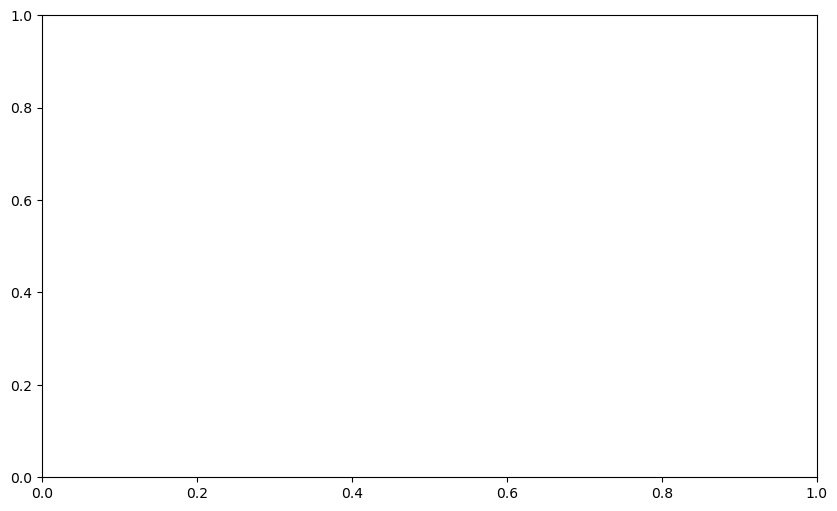

In [29]:
lr = 0.01
epochs = 1000


model = Linear(lr = lr, epochs = epochs, b = True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse, rmse, mae, r2 = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()